# はじめに

ここでは、Twitterの情報をKivyで表示するアプリを作ってみる。


# 某絵師のTwitter投稿ページを覗いてみる

とりあえず、mediaページを開いてそれっぽい画像URLを抽出してGetしてみる。

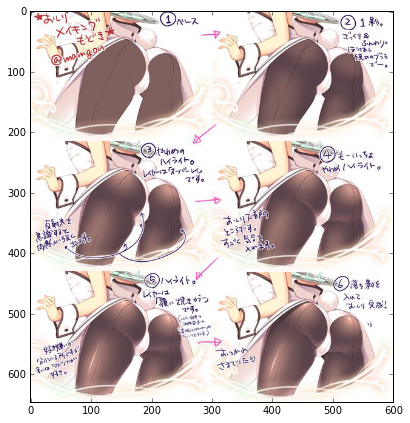

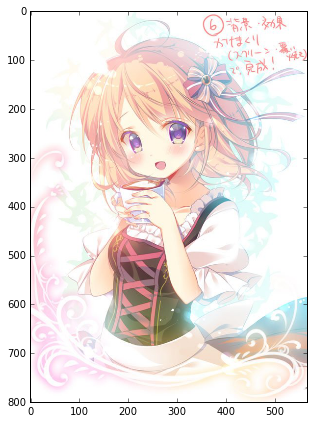

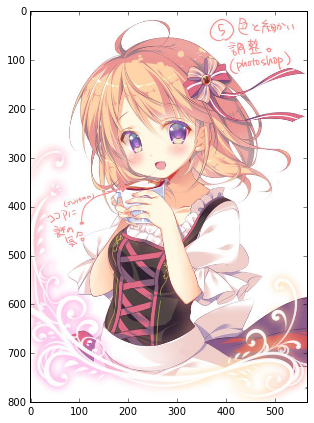

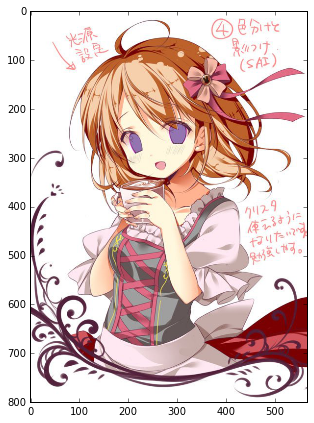

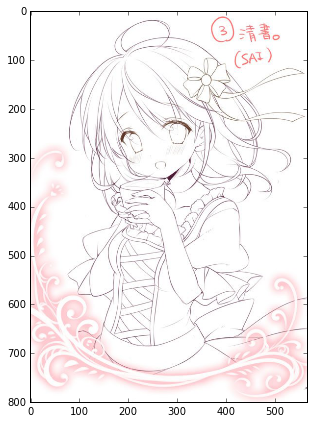

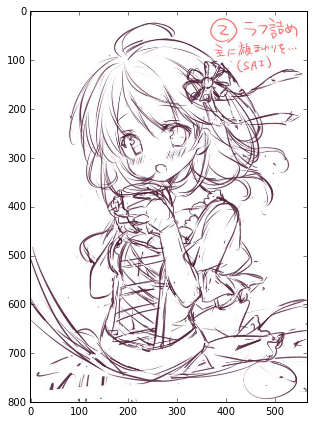

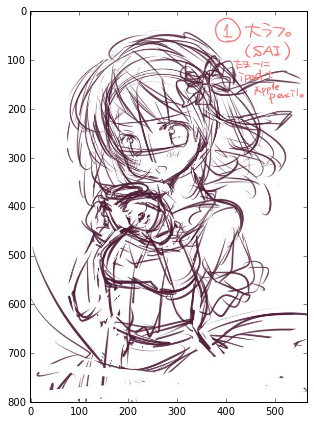

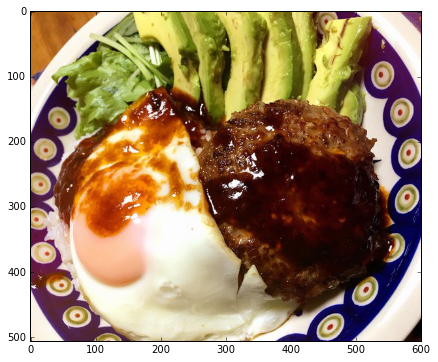

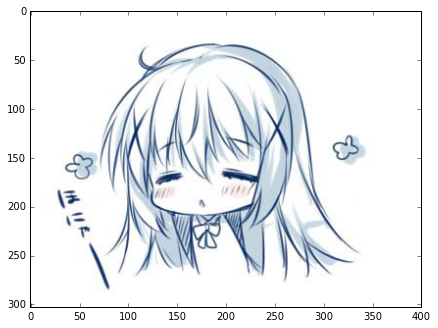

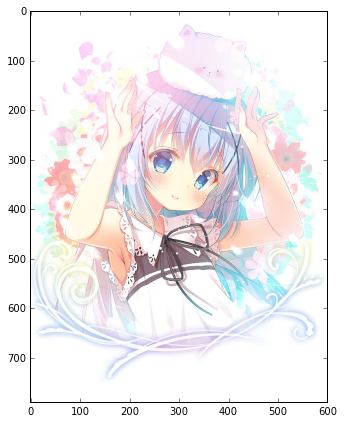

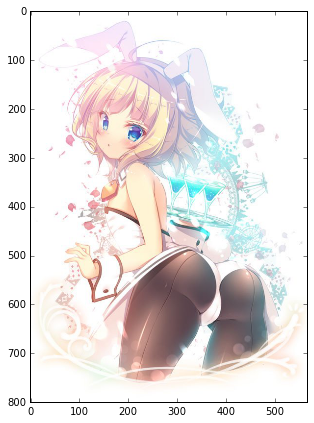

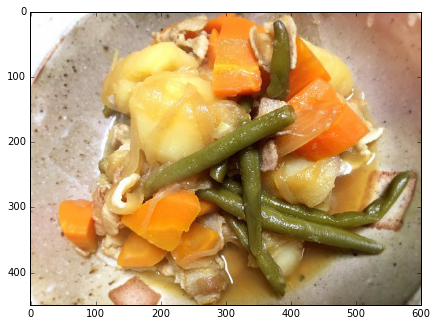

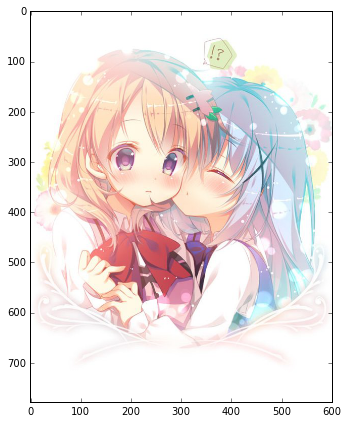

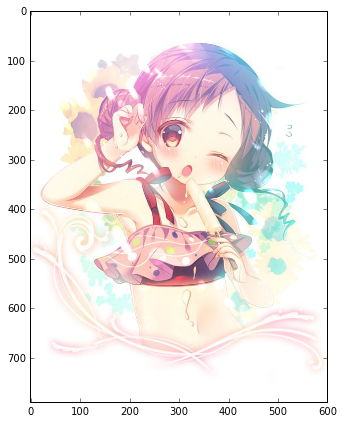

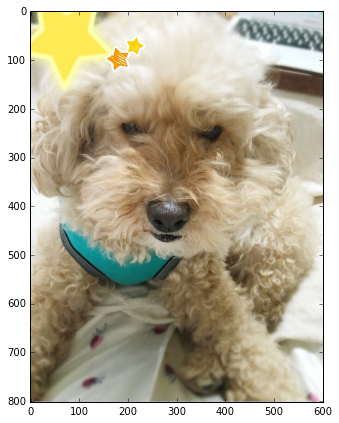

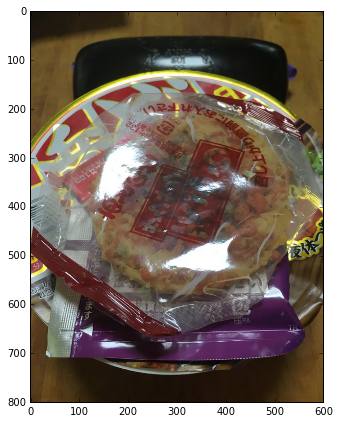

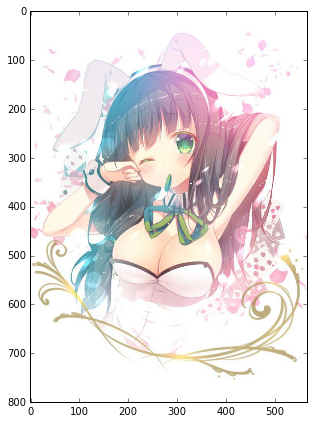

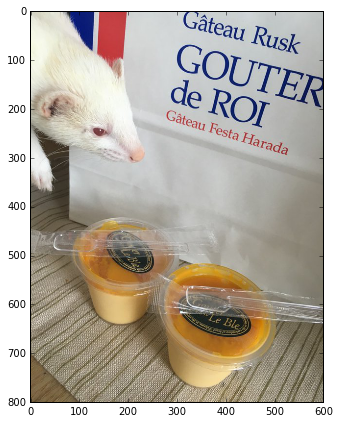

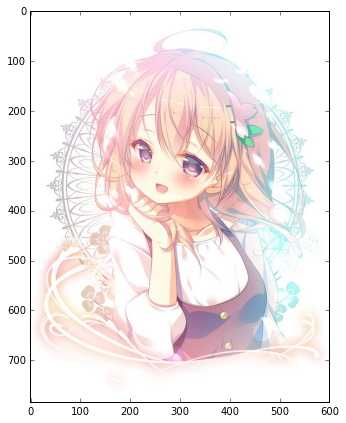

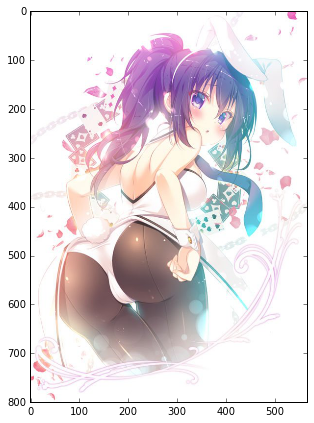

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import tempfile
import shutil
import requests
from bs4 import BeautifulSoup
%matplotlib inline

const_twitter_media_url = "https://twitter.com/mamgon/media"
const_img_pattern = re.compile(".*\/media\/.*jpg")

# temp_dir = tempfile.mkdtemp()
# os.mkdir('puripuri')
temp_dir = './puripuri'

r = requests.get(const_twitter_media_url)
soup = BeautifulSoup(r.text, "lxml")
for idx, img_tag in enumerate(soup.findAll("img", {'src':const_img_pattern})):
    img_url = img_tag["src"]
    temp_file_name = 'temp_img_' + str(idx) + "_.jpg"
        
    # いったん、Tempとして保存
    r = requests.get(img_url, stream=True)
    if r.status_code == 200:
        file_full_name = os.path.join(temp_dir, temp_file_name)
        with open(file_full_name, 'wb') as f:
            for chunk in r.iter_content(1024):
                f.write(chunk)

        # 画像データをロード
        img = mpimg.imread(file_full_name)

        # matplotlib を使って画像を表示
        fig = plt.figure(figsize=(7,7)) # 描画用の領域を用意
        ax1 = fig.add_subplot(1,1,1)    # 引数はそれぞれ 縦数、横数、index 
        ax1.imshow(img)
        
# remove the temp dir.
# shutil.rmtree(temp_dir)